In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import pickle
plt.rcParams['figure.figsize'] = (12.0, 10.0)

In [177]:
types = {'StateHoliday': np.dtype(str)}
train = pd.read_csv("train.csv", parse_dates=[2], dtype=types,nrows = 70000)
store = pd.read_csv("store.csv")

In [178]:
class Information:
    def __init__(self):
        """
        This class give some brief information about the datasets.
        """
        print("Information object created")
    
    def _get_missing_values(self,data):
        """
        Find missing values of given datad
        :param data: checked its missing value
        :return: Pandas Series object
        """
        #Getting sum of missing values for each feature
        missing_values = data.isnull().sum()
        #Feature missing values are sorted from few to many
        missing_values.sort_values(ascending=False, inplace=True)

        #Returning missing values
        return missing_values

In [179]:
class Preprocess:
    def __init_(self):
        print("Preprocess object created")
        
    def remove_no_sales(self,train):
        not_open = train[(train['Open'] == 0) & (train['Sales'] != 0)]
        print("No closed store with sales: " + str(not_open.size == 0))
        train = train.loc[train['Sales'] > 0]
        return train
        
    def date_range(self,train):
        dates = pd.to_datetime(train['Date'], format="%Y%m%d:%H:%M:%S.%f").sort_values()
        dates = dates.unique()
        start_date = dates[0]
        end_date = dates[-1]
        print("Start date: ", start_date)
        print("End Date: ", end_date)
        date_range = pd.date_range(start_date, end_date).values

In [180]:
p1 = Preprocess()
p1.remove_no_sales(train)
p1.date_range(train)

No closed store with sales: True
('Start date: ', numpy.datetime64('2013-01-01T00:00:00.000000000'))
('End Date: ', numpy.datetime64('2015-07-17T00:00:00.000000000'))


In [181]:
class Datavisualisation:
    def __init__(self):
        print ("DataVisualisation object created")
        
    def sales_per_day(self,train):
        plt.rcParams['figure.figsize'] = (12.0, 10.0)
        f, ax = plt.subplots(7, sharex=True, sharey=True)
        plt.rcParams['figure.figsize'] = (10.0, 50.0)
        for i in range(1, 8):
            mask = train[train['DayOfWeek'] == i]
            ax[i - 1].set_title("Day {0}".format(i))
            ax[i - 1].scatter(mask['Customers'], mask['Sales'], label=i)

        plt.legend()
        plt.xlabel('Customers')
        plt.ylabel('Sales')
        plt.savefig('output1.png', dpi=300, bbox_inches='tight')
        plt.show()
        

        
    def sales_per_customer(self,train):
        plt.rcParams['figure.figsize'] = (12.0, 10.0)
        plt.scatter(train['Customers'], train['Sales'], c=train['DayOfWeek'], alpha=0.8, cmap=plt.cm.get_cmap('plasma'))
        plt.colorbar()
        plt.xlabel('Customers')
        plt.ylabel('Sales')
        plt.savefig('output2.png', dpi=300, bbox_inches='tight')
        plt.show()

        
    def state_holiday(self,train):
        plt.rcParams['figure.figsize'] = (12.0, 10.0)
        for i in ["0", "a", "b", "c"]:
            data = train[train['StateHoliday'] == i]
            if (len(data) == 0):
                continue
            plt.scatter(data['Customers'], data['Sales'], label=i)
        plt.legend()
        plt.xlabel('Customers')
        plt.ylabel('Sales')
        plt.savefig('output3.png', dpi=300, bbox_inches='tight')
        plt.show()

    def school_holiday(self,train):
        plt.rcParams['figure.figsize'] = (12.0, 10.0)
        for i in [0, 1]:
            data = train[train['SchoolHoliday'] == i]
            if (len(data) == 0):
                continue
            plt.scatter(data['Customers'], data['Sales'], label=i)

        plt.legend()
        plt.xlabel('Customers')
        plt.ylabel('Sales')
        plt.savefig('output4.png', dpi=300, bbox_inches='tight')
        plt.show()

        
    def promo(self,train):
        plt.rcParams['figure.figsize'] = (12.0, 10.0)
        for i in [0, 1]:
            data = train[train['Promo'] == i]
            if (len(data) == 0):
                continue
            plt.scatter(data['Customers'], data['Sales'], label=i)

        plt.legend()
        plt.xlabel('Customers')
        plt.ylabel('Sales')
        plt.savefig('output5.png', dpi=300, bbox_inches='tight')
        plt.show()

    def add_store(self,train,store):
        plt.rcParams['figure.figsize'] = (12.0, 10.0)
        train['SalesPerCustomer'] = train['Sales'] / train['Customers']
        avg_store = train.groupby('Store')[['Sales', 'Customers', 'SalesPerCustomer']].median()
        avg_store.rename(columns=lambda x: 'Avg' + x, inplace=True)
        store = pd.merge(avg_store.reset_index(), store, on='Store')
        return store
    def store_type(self,store):
        plt.rcParams['figure.figsize'] = (12.0, 10.0)
        for i in ['a', 'b', 'c', 'd']:
            data = store[store['StoreType'] == i]
            if(len(data) == 0):
                continue
            plt.scatter(data['AvgCustomers'], data['AvgSales'], label=i)
        plt.legend()
        plt.xlabel('Average Customers')
        plt.ylabel('Average Sales')
        plt.savefig('output6.png', dpi=300, bbox_inches='tight')
        plt.show()

    def assortment(self,store):
        plt.rcParams['figure.figsize'] = (12.0, 10.0)
        for i in ['a', 'b', 'c']:
            data = store[store['Assortment'] == i]
            if (len(data) == 0):
                continue
            plt.scatter(data['AvgCustomers'], data['AvgSales'], label=i)
        plt.legend()
        plt.xlabel('Average Customers')
        plt.ylabel('Average Sales')
        plt.savefig('output7.png', dpi=300, bbox_inches='tight')
        plt.show()

    def promo2(self,store):
        plt.rcParams['figure.figsize'] = (12.0, 10.0)
        for i in [0, 1]:
            data = store[store['Promo2'] == i]
            if (len(data) == 0):
                continue
            plt.scatter(data['AvgCustomers'], data['AvgSales'], label=i)

        plt.legend()
        plt.xlabel('Average Customers')
        plt.ylabel('Average Sales')
        plt.savefig('output8.png', dpi=300, bbox_inches='tight')
        plt.show()

    def fill_na_values(self,store):
        plt.rcParams['figure.figsize'] = (12.0, 10.0)
        # fill NaN values
        store["CompetitionDistance"].fillna(-1)
        plt.scatter(store['CompetitionDistance'], store['AvgSales'])

        plt.xlabel('CompetitionDistance')
        plt.ylabel('Average Sales')
        plt.savefig('output9.png', dpi=300, bbox_inches='tight')
        plt.show()
        return store

In [182]:
class Features:
    def __init__(self):
        print ("Features object created")
    def string_to_int(self,store,train):
        store['StoreType'] = store['StoreType'].astype('category').cat.codes
        store['Assortment'] = store['Assortment'].astype('category').cat.codes
        train["StateHoliday"] = train["StateHoliday"].astype('category').cat.codes
        merged = pd.merge(train, store, on='Store', how='left')
        return merged
    def remove_nan(self,merged):
        NaN_replace = 0
        merged.fillna(NaN_replace, inplace=True)
        merged['Year'] = merged.Date.dt.year
        merged['Month'] = merged.Date.dt.month
        merged['Day'] = merged.Date.dt.day
        merged['Week'] = merged.Date.dt.week
        return merged
    def Month_Competetions(self,merged):
        # Number of months that competition has existed for
        NaN_replace = 0
        merged['MonthsCompetitionOpen'] = 12 * (merged['Year'] - merged['CompetitionOpenSinceYear']) + \
        (merged['Month'] - merged['CompetitionOpenSinceMonth'])
        merged.loc[merged['CompetitionOpenSinceYear'] == NaN_replace, 'MonthsCompetitionOpen'] = NaN_replace
        return merged
    def Weeks_promo_open(self,merged):
        # Number of weeks that promotion has existed for
        NaN_replace = 0
        merged['WeeksPromoOpen'] = 12 * (merged['Year'] - merged['Promo2SinceYear']) + \
        (merged['Date'].dt.weekofyear - merged['Promo2SinceWeek'])
        merged.loc[merged['Promo2SinceYear'] == NaN_replace, 'WeeksPromoOpen'] = NaN_replace
        return merged
    def to_int(self,merged):
        toInt = [
            'CompetitionOpenSinceMonth',
            'CompetitionOpenSinceYear',
            'Promo2SinceWeek', 
            'Promo2SinceYear', 
            'MonthsCompetitionOpen', 
            'WeeksPromoOpen'
        ]
        merged[toInt] = merged[toInt].astype(int)
        return merged
    def add_mean(self,train,store):
        med_store = train.groupby('Store')[['Sales', 'Customers', 'SalesPerCustomer']].mean()
        med_store.rename(columns=lambda x: 'Med' + x, inplace=True)
        store = pd.merge(med_store.reset_index(), store, on='Store')
        return store

In [183]:
# rmpse_scorer = make_scorer(rmspe, greater_is_better = False) # Loss function


In [184]:
train_info = Information()
train_info._get_missing_values(train)

Information object created


Id               0
SchoolHoliday    0
StateHoliday     0
Promo            0
Open             0
Customers        0
Sales            0
Date             0
DayOfWeek        0
Store            0
dtype: int64

In [185]:
store_info = Information()
store_info._get_missing_values(store)

Information object created


PromoInterval                544
Promo2SinceYear              544
Promo2SinceWeek              544
CompetitionOpenSinceYear     354
CompetitionOpenSinceMonth    354
CompetitionDistance            3
Promo2                         0
Assortment                     0
StoreType                      0
Store                          0
dtype: int64

In [186]:
train_preprocess = Preprocess()
train = train_preprocess.remove_no_sales(train)
train_preprocess.date_range(train)

No closed store with sales: True
('Start date: ', numpy.datetime64('2013-01-01T00:00:00.000000000'))
('End Date: ', numpy.datetime64('2015-07-17T00:00:00.000000000'))


DataVisualisation object created


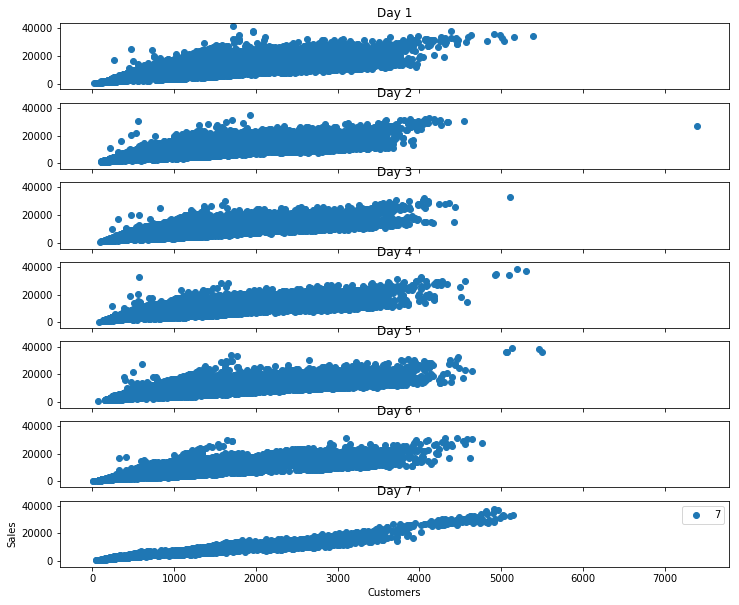

In [187]:
EDA = Datavisualisation()
EDA.sales_per_day(train)

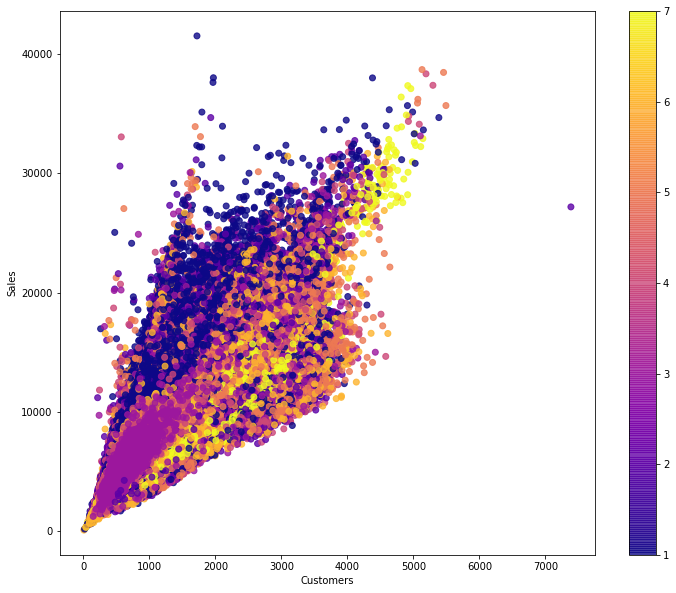

In [188]:
EDA.sales_per_customer(train)


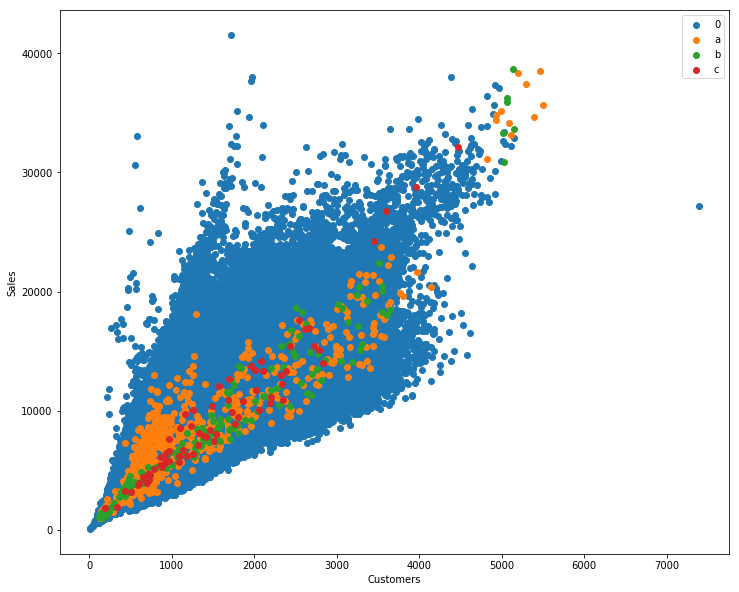

In [189]:
EDA.state_holiday(train)

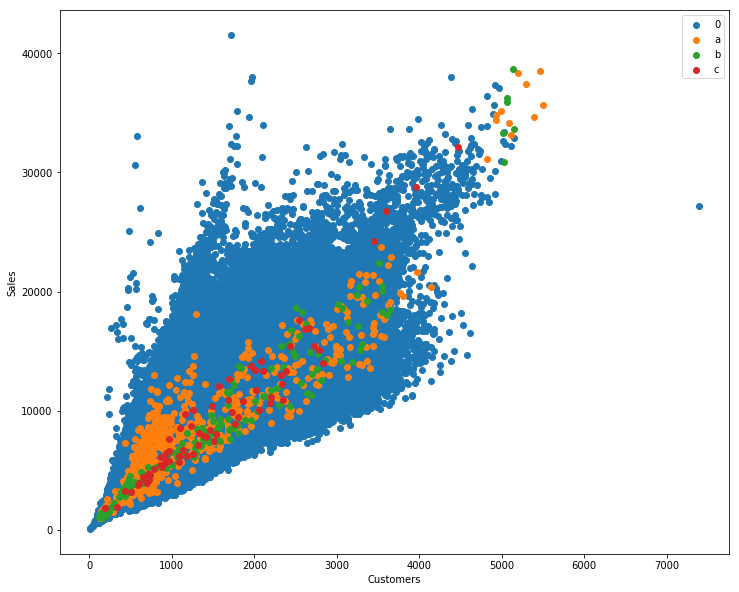

In [190]:
EDA.state_holiday(train)

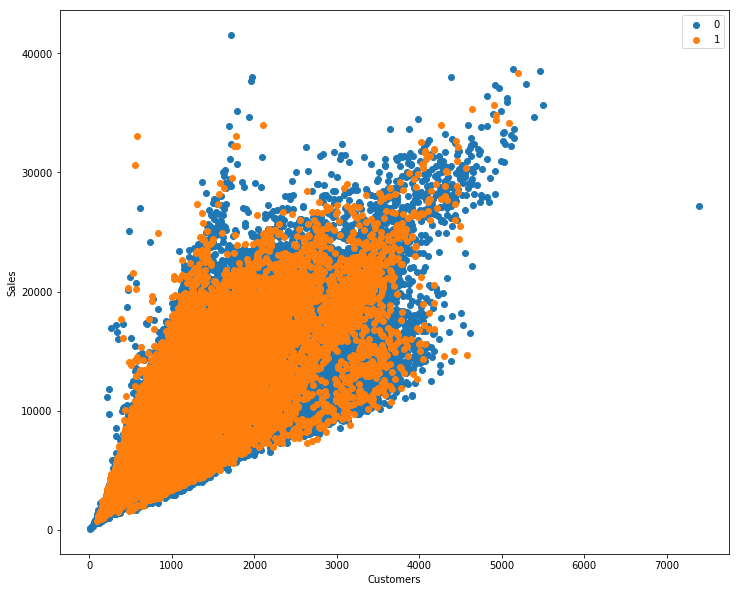

In [191]:
EDA.school_holiday(train)

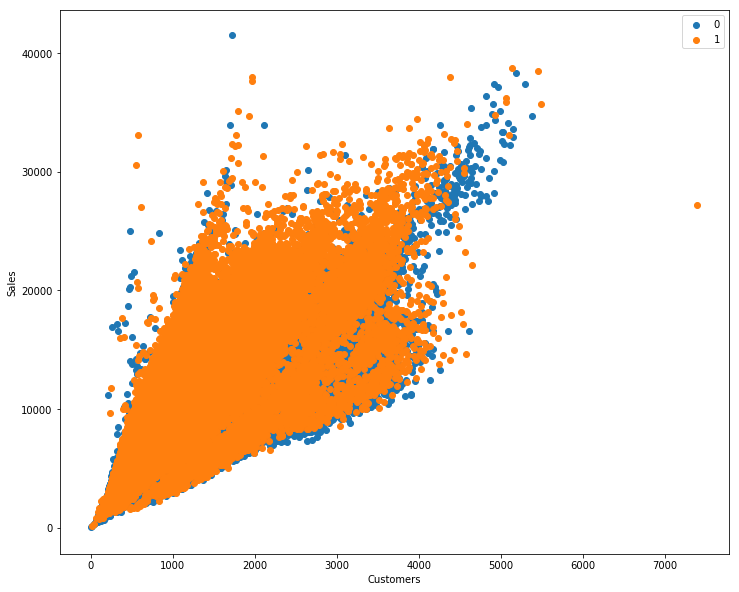

In [192]:
EDA.promo(train)

In [193]:
store = EDA.add_store(train,store)

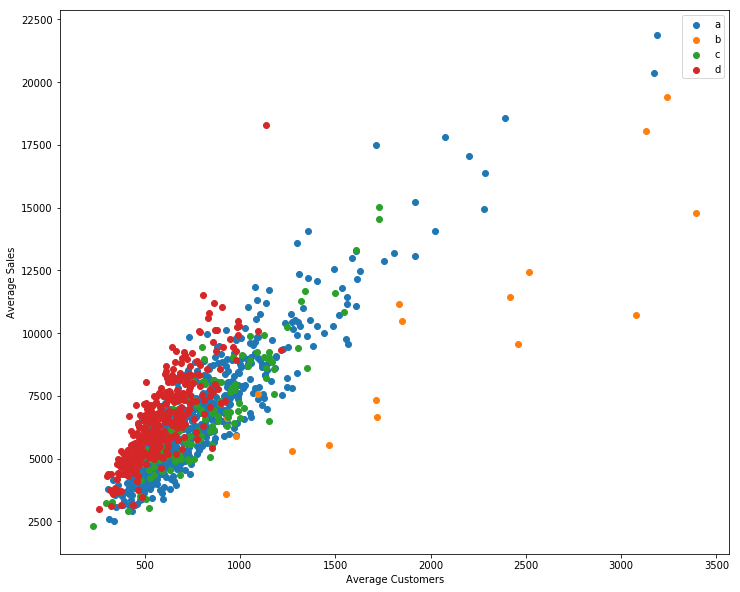

In [194]:
EDA.store_type(store)

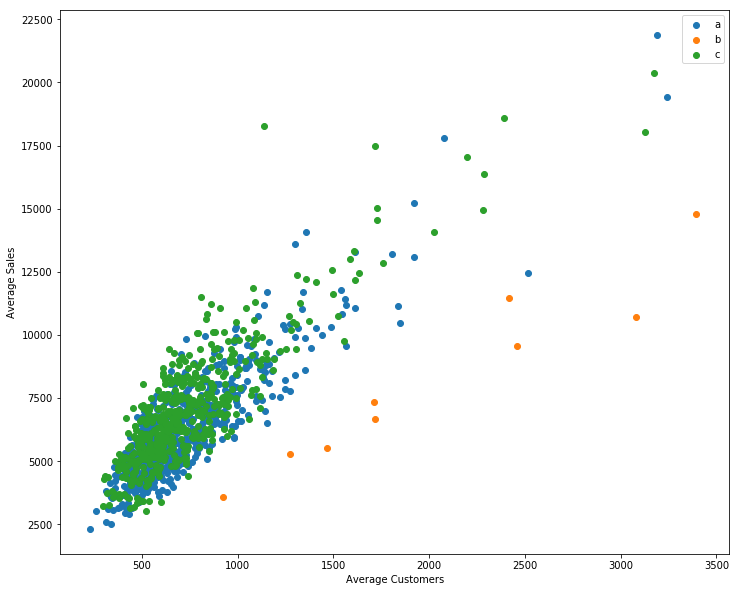

In [195]:
EDA.assortment(store)

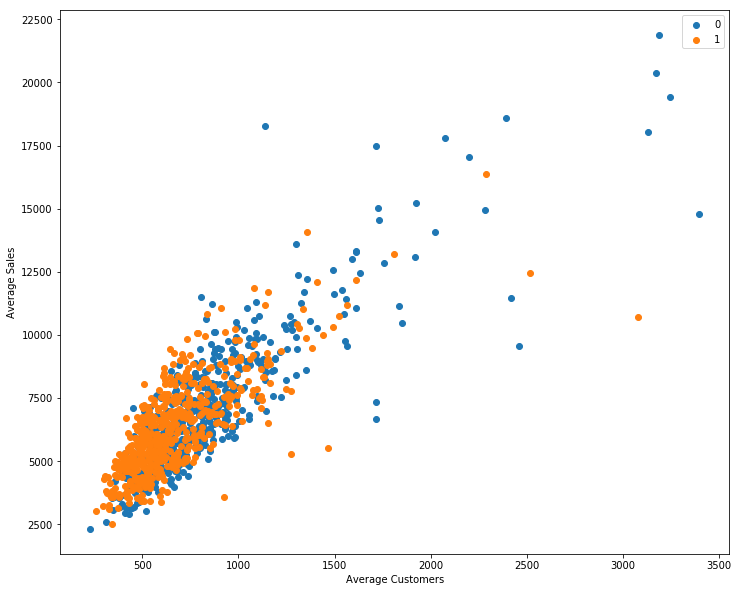

In [196]:
EDA.promo2(store)

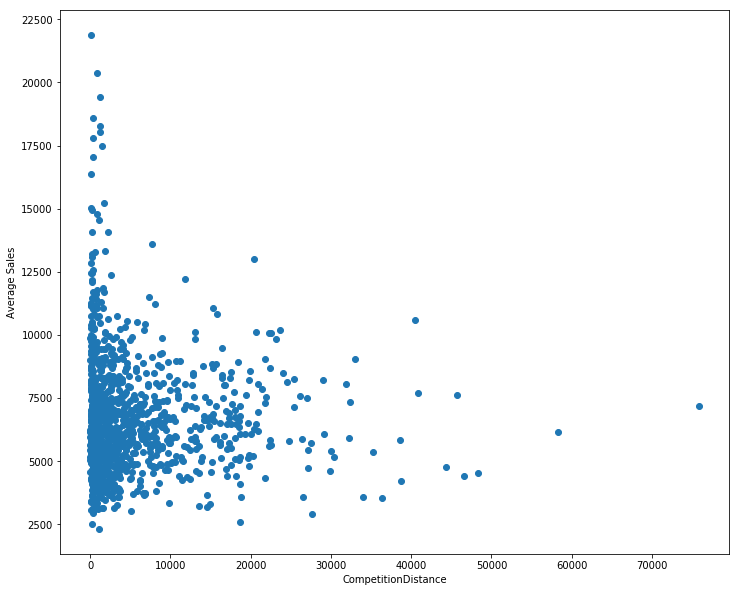

In [197]:
store = EDA.fill_na_values(store)

In [198]:
feature_selection = Features()

Features object created


In [199]:
store = feature_selection.add_mean(train,store)

In [200]:
merge = feature_selection.string_to_int(store,train)

In [201]:
merge = feature_selection.remove_nan(merge)

In [202]:
merge = feature_selection.Month_Competetions(merge)

In [203]:
merge = feature_selection.Weeks_promo_open(merge)

In [204]:
merge = feature_selection.to_int(merge)

In [205]:
merge.shape
merge['CompetitionDistance'] = np.log(merge['CompetitionDistance'] + 1)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


0          7.146772
1          6.345636
2          9.556055
3          6.429719
4         10.305948
5          5.736572
6         10.085809
7          8.925321
8          7.615791
9          8.058327
10         6.866933
11         6.975414
12         5.736572
13         7.170120
14         8.321178
15         8.092545
16         3.912023
17         9.535318
18         8.083329
19         7.757906
20         6.309918
21         6.946976
22         8.308938
23         8.431635
24         6.063785
25         7.740664
26         4.094345
27         7.090077
28         7.682482
29         3.688879
            ...    
830888     7.200425
830889     5.560682
830890     5.799093
830891     8.581107
830892     7.244228
830893     6.291569
830894     8.157657
830895     6.802395
830896     7.549609
830897     7.539027
830898     9.133459
830899     6.768493
830900     8.584852
830901     7.533694
830902     5.347108
830903     7.073270
830904     8.199739
830905     4.499810
830906     6.802395


In [206]:
X = [
    'Store', 
    'Customers',
    'CompetitionDistance', 

    'Promo', 
    'Promo2', 

#     'SchoolHoliday',
    'StateHoliday',
    'StoreType',
    'Assortment',

    'AvgSales',
    'AvgCustomers',
    'AvgSalesPerCustomer',
    
    'MedSales',
    'MedCustomers',
    'MedSalesPerCustomer',

    'DayOfWeek',
    'Week',
    'Day',
    'Month',
    'Year',

    'CompetitionOpenSinceMonth',
    'CompetitionOpenSinceYear',
    'Promo2SinceWeek',
    'Promo2SinceYear',

#     'MonthsCompetitionOpen',
#     'WeeksPromoOpen'
]
X_train, X_test, y_train, y_test = train_test_split(merge[X], merge['Sales'], test_size=0.1, random_state=10)

In [207]:
# Error calculating function according to kaggle
def rmspe(y, y_hat):
    return np.sqrt(np.mean(((y - y_hat) / y) ** 2))

rmpse_scorer = make_scorer(rmspe, greater_is_better = False) # Loss function

def score(model, X_train, y_train, y_test, y_hat):
    score = cross_val_score(model, X_train, y_train, scoring=rmpse_scorer, cv=5)
    print('Mean', score.mean())
    print('Variance', score.var())
    print('RMSPE', rmspe(y_test, y_hat))

def plot_importance(model):
    k = list(zip(X, model.feature_importances_))
    k.sort(key=lambda tup: tup[1])

    labels, vals = zip(*k)
    
    plt.barh(np.arange(len(X)), vals, align='center')
    plt.yticks(np.arange(len(X)), labels)

In [208]:
import xgboost as xgb

def rmspe_xg(yhat, y):
    y = np.expm1(y.get_label())
    yhat = np.expm1(yhat)
    return "rmspe", rmspe(y,yhat)

xgboost_tree = xgb.XGBRegressor(
    n_estimators = 1000,
    max_depth = 2,
    tree_method = 'exact',
    reg_alpha = 0.05,
    silent = 0,
    random_state = 1023
)
xgboost_tree.fit(X_train[X], np.log1p(y_train), 
                 eval_set = [(X_train[X], np.log1p(y_train)), (X_test[X], np.log1p(y_test))],
                 eval_metric = rmspe_xg,
                 early_stopping_rounds = 300
                )
filename="Private_score.sav"
pickle.dump(xgboost_tree, open(filename,"wb"))

[19:06:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[0]	validation_0-rmse:7.44236	validation_1-rmse:7.44482	validation_0-rmspe:0.99953	validation_1-rmspe:0.999531
Multiple eval metrics have been passed: 'validation_1-rmspe' will be used for early stopping.

Will train until validation_1-rmspe hasn't improved in 300 rounds.
[19:06:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[1]	validation_0-rmse:6.69905	validation_1-rmse:6.70127	validation_0-rmspe:0.998833	validation_1-rmspe:0.998836
[19:06:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[2]	validation_0-rmse:6.03013	validation_1-rmse:6.03219	validation_0-rmspe:0.997579	validation_1-rmspe:0.997584
[19:06:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[3]	validation_

[34]	validation_0-rmse:0.250189	validation_1-rmse:0.250767	validation_0-rmspe:0.221693	validation_1-rmspe:0.228741
[19:06:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[35]	validation_0-rmse:0.232017	validation_1-rmse:0.232605	validation_0-rmspe:0.209044	validation_1-rmspe:0.216849
[19:06:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[36]	validation_0-rmse:0.21612	validation_1-rmse:0.216718	validation_0-rmspe:0.196774	validation_1-rmspe:0.204652
[19:06:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[37]	validation_0-rmse:0.202031	validation_1-rmse:0.202645	validation_0-rmspe:0.187043	validation_1-rmspe:0.1956
[19:06:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[38]	validation_0-rmse:0.189702	validation_1-rmse:0.190

[69]	validation_0-rmse:0.100214	validation_1-rmse:0.100861	validation_0-rmspe:0.113322	validation_1-rmspe:0.125261
[19:07:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[70]	validation_0-rmse:0.099712	validation_1-rmse:0.100387	validation_0-rmspe:0.113002	validation_1-rmspe:0.125146
[19:07:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[71]	validation_0-rmse:0.099095	validation_1-rmse:0.099762	validation_0-rmspe:0.112545	validation_1-rmspe:0.124703
[19:07:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[72]	validation_0-rmse:0.098488	validation_1-rmse:0.099129	validation_0-rmspe:0.111898	validation_1-rmspe:0.124075
[19:07:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[73]	validation_0-rmse:0.097994	validation_1-rmse:0.

[104]	validation_0-rmse:0.086041	validation_1-rmse:0.086602	validation_0-rmspe:0.09495	validation_1-rmspe:0.103646
[19:08:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[105]	validation_0-rmse:0.085803	validation_1-rmse:0.086373	validation_0-rmspe:0.094766	validation_1-rmspe:0.103428
[19:08:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[106]	validation_0-rmse:0.085352	validation_1-rmse:0.085919	validation_0-rmspe:0.094328	validation_1-rmspe:0.102986
[19:08:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[107]	validation_0-rmse:0.085093	validation_1-rmse:0.085666	validation_0-rmspe:0.094081	validation_1-rmspe:0.102756
[19:08:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[108]	validation_0-rmse:0.084851	validation_1-rms

[19:08:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[139]	validation_0-rmse:0.077996	validation_1-rmse:0.078513	validation_0-rmspe:0.083775	validation_1-rmspe:0.090339
[19:08:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[140]	validation_0-rmse:0.077812	validation_1-rmse:0.078342	validation_0-rmspe:0.083586	validation_1-rmspe:0.090157
[19:08:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[141]	validation_0-rmse:0.077663	validation_1-rmse:0.078195	validation_0-rmspe:0.083393	validation_1-rmspe:0.089945
[19:08:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[142]	validation_0-rmse:0.077532	validation_1-rmse:0.07806	validation_0-rmspe:0.082956	validation_1-rmspe:0.08976
[19:08:42] /workspace/src/tree/updater_prune.cc:74

[19:09:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[174]	validation_0-rmse:0.073604	validation_1-rmse:0.07416	validation_0-rmspe:0.076791	validation_1-rmspe:0.084324
[19:09:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[175]	validation_0-rmse:0.073444	validation_1-rmse:0.074004	validation_0-rmspe:0.076637	validation_1-rmspe:0.084128
[19:09:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[176]	validation_0-rmse:0.073376	validation_1-rmse:0.073937	validation_0-rmspe:0.075748	validation_1-rmspe:0.084003
[19:09:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[177]	validation_0-rmse:0.073313	validation_1-rmse:0.073875	validation_0-rmspe:0.075694	validation_1-rmspe:0.083952
[19:09:17] /workspace/src/tree/updater_prune.cc:7

[208]	validation_0-rmse:0.07088	validation_1-rmse:0.071409	validation_0-rmspe:0.07227	validation_1-rmspe:0.078194
[19:09:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[209]	validation_0-rmse:0.070817	validation_1-rmse:0.071343	validation_0-rmspe:0.072199	validation_1-rmspe:0.078113
[19:09:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[210]	validation_0-rmse:0.070771	validation_1-rmse:0.071293	validation_0-rmspe:0.072143	validation_1-rmspe:0.078051
[19:09:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[211]	validation_0-rmse:0.070715	validation_1-rmse:0.071239	validation_0-rmspe:0.072093	validation_1-rmspe:0.077999
[19:09:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[212]	validation_0-rmse:0.07067	validation_1-rmse:

[19:10:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[244]	validation_0-rmse:0.069027	validation_1-rmse:0.069513	validation_0-rmspe:0.069716	validation_1-rmspe:0.073395
[19:10:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[245]	validation_0-rmse:0.068982	validation_1-rmse:0.069466	validation_0-rmspe:0.069661	validation_1-rmspe:0.073341
[19:10:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[246]	validation_0-rmse:0.068942	validation_1-rmse:0.069423	validation_0-rmspe:0.06962	validation_1-rmspe:0.073292
[19:10:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[247]	validation_0-rmse:0.068884	validation_1-rmse:0.06936	validation_0-rmspe:0.069557	validation_1-rmspe:0.073223
[19:10:27] /workspace/src/tree/updater_prune.cc:74

[19:10:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[279]	validation_0-rmse:0.067324	validation_1-rmse:0.067746	validation_0-rmspe:0.067542	validation_1-rmspe:0.069873
[19:10:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[280]	validation_0-rmse:0.067274	validation_1-rmse:0.067698	validation_0-rmspe:0.067493	validation_1-rmspe:0.069821
[19:11:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[281]	validation_0-rmse:0.067187	validation_1-rmse:0.067612	validation_0-rmspe:0.067412	validation_1-rmspe:0.069745
[19:11:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[282]	validation_0-rmse:0.067154	validation_1-rmse:0.067577	validation_0-rmspe:0.067372	validation_1-rmspe:0.069699
[19:11:02] /workspace/src/tree/updater_prune.cc:

[19:11:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[314]	validation_0-rmse:0.066124	validation_1-rmse:0.066509	validation_0-rmspe:0.066133	validation_1-rmspe:0.067854
[19:11:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[315]	validation_0-rmse:0.066101	validation_1-rmse:0.066487	validation_0-rmspe:0.066107	validation_1-rmspe:0.067818
[19:11:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[316]	validation_0-rmse:0.066085	validation_1-rmse:0.066448	validation_0-rmspe:0.066006	validation_1-rmspe:0.06746
[19:11:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[317]	validation_0-rmse:0.066053	validation_1-rmse:0.066415	validation_0-rmspe:0.065975	validation_1-rmspe:0.067429
[19:11:37] /workspace/src/tree/updater_prune.cc:7

[19:12:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[349]	validation_0-rmse:0.065335	validation_1-rmse:0.065695	validation_0-rmspe:0.065163	validation_1-rmspe:0.066558
[19:12:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[350]	validation_0-rmse:0.065317	validation_1-rmse:0.065678	validation_0-rmspe:0.065142	validation_1-rmspe:0.066538
[19:12:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[351]	validation_0-rmse:0.065295	validation_1-rmse:0.065655	validation_0-rmspe:0.065119	validation_1-rmspe:0.066514
[19:12:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[352]	validation_0-rmse:0.065259	validation_1-rmse:0.065621	validation_0-rmspe:0.065084	validation_1-rmspe:0.066481
[19:12:12] /workspace/src/tree/updater_prune.cc:

[19:12:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[384]	validation_0-rmse:0.064685	validation_1-rmse:0.065003	validation_0-rmspe:0.064376	validation_1-rmspe:0.065462
[19:12:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[385]	validation_0-rmse:0.064663	validation_1-rmse:0.064979	validation_0-rmspe:0.064354	validation_1-rmspe:0.065439
[19:12:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[386]	validation_0-rmse:0.064651	validation_1-rmse:0.064967	validation_0-rmspe:0.064341	validation_1-rmspe:0.065426
[19:12:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[387]	validation_0-rmse:0.064632	validation_1-rmse:0.064948	validation_0-rmspe:0.064324	validation_1-rmspe:0.065407
[19:12:46] /workspace/src/tree/updater_prune.cc:

[418]	validation_0-rmse:0.064172	validation_1-rmse:0.06446	validation_0-rmspe:0.06381	validation_1-rmspe:0.064738
[19:13:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[419]	validation_0-rmse:0.064148	validation_1-rmse:0.064436	validation_0-rmspe:0.063791	validation_1-rmspe:0.064718
[19:13:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[420]	validation_0-rmse:0.064137	validation_1-rmse:0.064426	validation_0-rmspe:0.063778	validation_1-rmspe:0.064706
[19:13:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[421]	validation_0-rmse:0.064127	validation_1-rmse:0.064415	validation_0-rmspe:0.063769	validation_1-rmspe:0.064695
[19:13:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[422]	validation_0-rmse:0.064117	validation_1-rmse

[453]	validation_0-rmse:0.063751	validation_1-rmse:0.064007	validation_0-rmspe:0.063347	validation_1-rmspe:0.064145
[19:13:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[454]	validation_0-rmse:0.063736	validation_1-rmse:0.063994	validation_0-rmspe:0.063333	validation_1-rmspe:0.064132
[19:13:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[455]	validation_0-rmse:0.063721	validation_1-rmse:0.063979	validation_0-rmspe:0.063317	validation_1-rmspe:0.064117
[19:13:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[456]	validation_0-rmse:0.063705	validation_1-rmse:0.063963	validation_0-rmspe:0.063301	validation_1-rmspe:0.064102
[19:13:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[457]	validation_0-rmse:0.063692	validation_1-rm

[19:14:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[488]	validation_0-rmse:0.063374	validation_1-rmse:0.063611	validation_0-rmspe:0.062944	validation_1-rmspe:0.063663
[19:14:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[489]	validation_0-rmse:0.063366	validation_1-rmse:0.063606	validation_0-rmspe:0.062938	validation_1-rmspe:0.063659
[19:14:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[490]	validation_0-rmse:0.063362	validation_1-rmse:0.063602	validation_0-rmspe:0.062932	validation_1-rmspe:0.063653
[19:14:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[491]	validation_0-rmse:0.063352	validation_1-rmse:0.063592	validation_0-rmspe:0.062922	validation_1-rmspe:0.063645
[19:14:30] /workspace/src/tree/updater_prune.cc:

[522]	validation_0-rmse:0.063112	validation_1-rmse:0.063339	validation_0-rmspe:0.062654	validation_1-rmspe:0.063323
[19:15:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[523]	validation_0-rmse:0.063104	validation_1-rmse:0.06333	validation_0-rmspe:0.062644	validation_1-rmspe:0.06331
[19:15:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[524]	validation_0-rmse:0.063096	validation_1-rmse:0.063321	validation_0-rmspe:0.062635	validation_1-rmspe:0.0633
[19:15:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[525]	validation_0-rmse:0.063089	validation_1-rmse:0.063313	validation_0-rmspe:0.062628	validation_1-rmspe:0.063292
[19:15:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[526]	validation_0-rmse:0.063085	validation_1-rmse:0

[19:15:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[557]	validation_0-rmse:0.062864	validation_1-rmse:0.063085	validation_0-rmspe:0.062387	validation_1-rmspe:0.063041
[19:15:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[558]	validation_0-rmse:0.062856	validation_1-rmse:0.063076	validation_0-rmspe:0.062379	validation_1-rmspe:0.063031
[19:15:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[559]	validation_0-rmse:0.06284	validation_1-rmse:0.063056	validation_0-rmspe:0.062359	validation_1-rmspe:0.063003
[19:15:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[560]	validation_0-rmse:0.062835	validation_1-rmse:0.063051	validation_0-rmspe:0.062353	validation_1-rmspe:0.062996
[19:15:38] /workspace/src/tree/updater_prune.cc:7

[19:16:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[592]	validation_0-rmse:0.062631	validation_1-rmse:0.062845	validation_0-rmspe:0.062138	validation_1-rmspe:0.062771
[19:16:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[593]	validation_0-rmse:0.062624	validation_1-rmse:0.062842	validation_0-rmspe:0.062125	validation_1-rmspe:0.062767
[19:16:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[594]	validation_0-rmse:0.06262	validation_1-rmse:0.062837	validation_0-rmspe:0.06212	validation_1-rmspe:0.062762
[19:16:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[595]	validation_0-rmse:0.062618	validation_1-rmse:0.062835	validation_0-rmspe:0.062114	validation_1-rmspe:0.062755
[19:16:13] /workspace/src/tree/updater_prune.cc:74

[19:16:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[627]	validation_0-rmse:0.062432	validation_1-rmse:0.062646	validation_0-rmspe:0.061921	validation_1-rmspe:0.062557
[19:16:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[628]	validation_0-rmse:0.062418	validation_1-rmse:0.062635	validation_0-rmspe:0.061908	validation_1-rmspe:0.062546
[19:16:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[629]	validation_0-rmse:0.062416	validation_1-rmse:0.062635	validation_0-rmspe:0.061904	validation_1-rmspe:0.062546
[19:16:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[630]	validation_0-rmse:0.062411	validation_1-rmse:0.062627	validation_0-rmspe:0.061897	validation_1-rmspe:0.062538
[19:16:48] /workspace/src/tree/updater_prune.cc:

[661]	validation_0-rmse:0.062257	validation_1-rmse:0.062476	validation_0-rmspe:0.061736	validation_1-rmspe:0.062379
[19:17:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[662]	validation_0-rmse:0.062252	validation_1-rmse:0.062472	validation_0-rmspe:0.061731	validation_1-rmspe:0.062375
[19:17:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[663]	validation_0-rmse:0.062249	validation_1-rmse:0.062469	validation_0-rmspe:0.061728	validation_1-rmspe:0.062371
[19:17:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[664]	validation_0-rmse:0.062244	validation_1-rmse:0.062463	validation_0-rmspe:0.061723	validation_1-rmspe:0.062366
[19:17:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[665]	validation_0-rmse:0.062236	validation_1-rm

[19:17:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[696]	validation_0-rmse:0.062094	validation_1-rmse:0.062314	validation_0-rmspe:0.061558	validation_1-rmspe:0.062203
[19:17:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[697]	validation_0-rmse:0.06209	validation_1-rmse:0.062309	validation_0-rmspe:0.061554	validation_1-rmspe:0.062199
[19:17:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[698]	validation_0-rmse:0.062087	validation_1-rmse:0.062307	validation_0-rmspe:0.061551	validation_1-rmspe:0.062196
[19:17:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[699]	validation_0-rmse:0.062084	validation_1-rmse:0.062303	validation_0-rmspe:0.061547	validation_1-rmspe:0.062193
[19:17:56] /workspace/src/tree/updater_prune.cc:7

[19:18:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[731]	validation_0-rmse:0.061948	validation_1-rmse:0.062165	validation_0-rmspe:0.061402	validation_1-rmspe:0.062037
[19:18:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[732]	validation_0-rmse:0.061944	validation_1-rmse:0.062163	validation_0-rmspe:0.061398	validation_1-rmspe:0.062034
[19:18:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[733]	validation_0-rmse:0.061941	validation_1-rmse:0.062159	validation_0-rmspe:0.061395	validation_1-rmspe:0.06203
[19:18:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[734]	validation_0-rmse:0.061939	validation_1-rmse:0.062157	validation_0-rmspe:0.061393	validation_1-rmspe:0.062029
[19:18:31] /workspace/src/tree/updater_prune.cc:7

[765]	validation_0-rmse:0.061828	validation_1-rmse:0.06205	validation_0-rmspe:0.061276	validation_1-rmspe:0.061913
[19:19:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[766]	validation_0-rmse:0.061826	validation_1-rmse:0.062048	validation_0-rmspe:0.061274	validation_1-rmspe:0.061911
[19:19:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[767]	validation_0-rmse:0.061817	validation_1-rmse:0.062037	validation_0-rmspe:0.061264	validation_1-rmspe:0.061901
[19:19:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[768]	validation_0-rmse:0.061807	validation_1-rmse:0.06203	validation_0-rmspe:0.061254	validation_1-rmspe:0.061892
[19:19:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[769]	validation_0-rmse:0.061799	validation_1-rmse

[19:19:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[801]	validation_0-rmse:0.06169	validation_1-rmse:0.061917	validation_0-rmspe:0.061131	validation_1-rmspe:0.061778
[19:19:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[802]	validation_0-rmse:0.061684	validation_1-rmse:0.061912	validation_0-rmspe:0.061125	validation_1-rmspe:0.061772
[19:19:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[803]	validation_0-rmse:0.061679	validation_1-rmse:0.061907	validation_0-rmspe:0.061119	validation_1-rmspe:0.061766
[19:19:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[804]	validation_0-rmse:0.061676	validation_1-rmse:0.061903	validation_0-rmspe:0.061116	validation_1-rmspe:0.061762
[19:19:40] /workspace/src/tree/updater_prune.cc:7

[19:20:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[836]	validation_0-rmse:0.06157	validation_1-rmse:0.061796	validation_0-rmspe:0.061005	validation_1-rmspe:0.061653
[19:20:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[837]	validation_0-rmse:0.061568	validation_1-rmse:0.061795	validation_0-rmspe:0.061003	validation_1-rmspe:0.061651
[19:20:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[838]	validation_0-rmse:0.061563	validation_1-rmse:0.061789	validation_0-rmspe:0.060999	validation_1-rmspe:0.061646
[19:20:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[839]	validation_0-rmse:0.061561	validation_1-rmse:0.061787	validation_0-rmspe:0.060996	validation_1-rmspe:0.061643
[19:20:15] /workspace/src/tree/updater_prune.cc:7

[19:20:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[871]	validation_0-rmse:0.061465	validation_1-rmse:0.06169	validation_0-rmspe:0.060894	validation_1-rmspe:0.061536
[19:20:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[872]	validation_0-rmse:0.061459	validation_1-rmse:0.061682	validation_0-rmspe:0.060885	validation_1-rmspe:0.061521
[19:20:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[873]	validation_0-rmse:0.061455	validation_1-rmse:0.061678	validation_0-rmspe:0.060881	validation_1-rmspe:0.061518
[19:20:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[874]	validation_0-rmse:0.061453	validation_1-rmse:0.061676	validation_0-rmspe:0.060878	validation_1-rmspe:0.061515
[19:20:50] /workspace/src/tree/updater_prune.cc:7

[19:21:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[906]	validation_0-rmse:0.061369	validation_1-rmse:0.06159	validation_0-rmspe:0.060789	validation_1-rmspe:0.061411
[19:21:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[907]	validation_0-rmse:0.061368	validation_1-rmse:0.06159	validation_0-rmspe:0.060788	validation_1-rmspe:0.061411
[19:21:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[908]	validation_0-rmse:0.061367	validation_1-rmse:0.061588	validation_0-rmspe:0.060787	validation_1-rmspe:0.06141
[19:21:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[909]	validation_0-rmse:0.061363	validation_1-rmse:0.061585	validation_0-rmspe:0.060782	validation_1-rmspe:0.061405
[19:21:25] /workspace/src/tree/updater_prune.cc:74:

[19:21:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[941]	validation_0-rmse:0.061271	validation_1-rmse:0.061494	validation_0-rmspe:0.06069	validation_1-rmspe:0.061313
[19:21:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[942]	validation_0-rmse:0.061269	validation_1-rmse:0.061492	validation_0-rmspe:0.060689	validation_1-rmspe:0.061312
[19:21:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[943]	validation_0-rmse:0.061263	validation_1-rmse:0.061483	validation_0-rmspe:0.060681	validation_1-rmspe:0.061299
[19:21:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[944]	validation_0-rmse:0.061262	validation_1-rmse:0.061482	validation_0-rmspe:0.060679	validation_1-rmspe:0.061297
[19:22:00] /workspace/src/tree/updater_prune.cc:7

[19:22:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[976]	validation_0-rmse:0.06118	validation_1-rmse:0.061398	validation_0-rmspe:0.060591	validation_1-rmspe:0.061208
[19:22:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[977]	validation_0-rmse:0.061176	validation_1-rmse:0.061395	validation_0-rmspe:0.060586	validation_1-rmspe:0.061203
[19:22:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[978]	validation_0-rmse:0.061175	validation_1-rmse:0.061394	validation_0-rmspe:0.060584	validation_1-rmspe:0.061201
[19:22:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[979]	validation_0-rmse:0.061174	validation_1-rmse:0.061393	validation_0-rmspe:0.060582	validation_1-rmspe:0.061199
[19:22:34] /workspace/src/tree/updater_prune.cc:7

Note that this is not in percentage, thus not to scale of graphs above


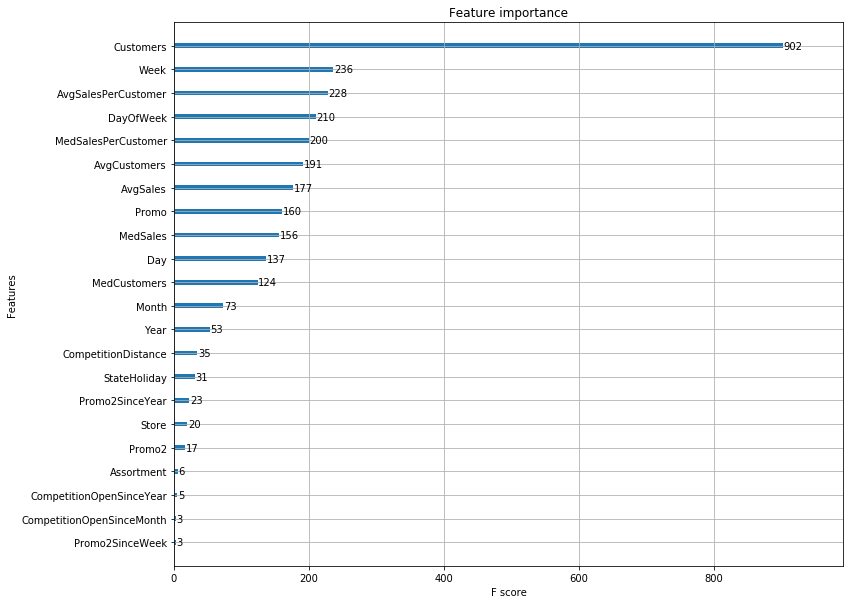

In [209]:
print("Note that this is not in percentage, thus not to scale of graphs above")
xgb.plot_importance(xgboost_tree)

In [211]:
types = {'StateHoliday': np.dtype(str)}
test = pd.read_csv("test.csv", parse_dates=[3], dtype=types)
feature_selection = Features()
test_merge = feature_selection.string_to_int(store,test)
test_merge = feature_selection.remove_nan(test_merge)
test_merge = feature_selection.Month_Competetions(test_merge)
test_merge = feature_selection.Weeks_promo_open(test_merge)
test_merge = feature_selection.to_int(test_merge)
test_merge.shape
test_merge['CompetitionDistance'] = np.log(test_merge['CompetitionDistance'])
test = test_merge
y_hat = np.expm1(xgboost_tree.predict(test[X]))
ids = test.Id
df = pd.DataFrame({"Id": ids, 'Sales': y_hat})
df.loc[test['Open'] == 0, 'Sales'] = 0
# df = df[df.Sales != 0]
df.to_csv('submission.csv', index=False)

Features object created


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
